In [35]:
%load_ext autoreload
%autoreload 2

import cosmohmc.linear.sampler as sampler
import numpy as np
from matplotlib import pyplot as plt
import corner

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


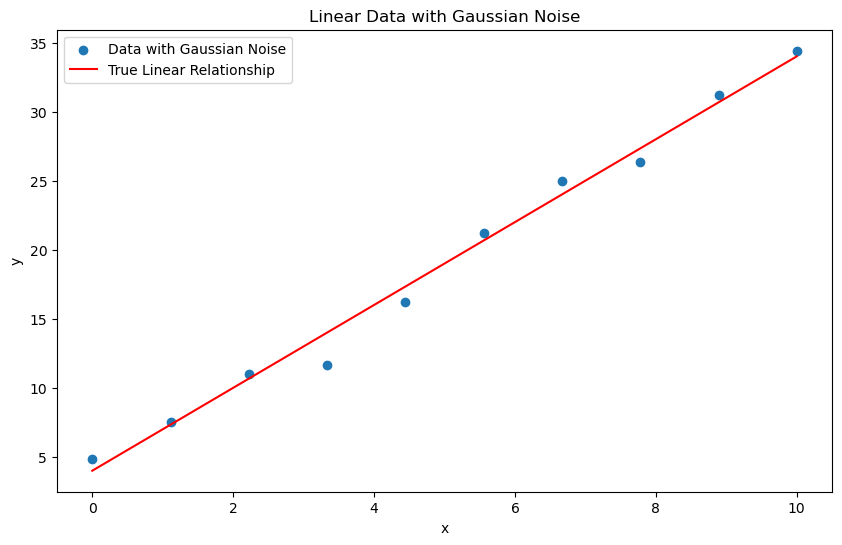

In [36]:
slope = 3
intercept = 4
n_points = 10

# Generate linear data
x = np.linspace(0, 10, n_points)
y_true = slope * x + intercept

# Add Gaussian noise
np.random.seed(20)
noise = np.random.normal(0, 1, n_points)
y_noisy = y_true + noise

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, label='Data with Gaussian Noise')
plt.plot(x, y_true, color='red', label='True Linear Relationship')
plt.title('Linear Data with Gaussian Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [47]:
linear_dist = sampler.linear_post(x_data=x, y_data=y_noisy, anal_grad=False, proposal_width=0.5, step_size=0.05, n_steps=10, n_samples=10000)

In [48]:
burnin = 1000
mc_samples, acc_mc = linear_dist.mcmc_sample()
hmc_samples, acc_hmc = linear_dist.hmc_sample()
mc_samples = mc_samples[burnin:]
hmc_samples = hmc_samples[burnin:]

Sampling (HMC): 100%|██████████| 10000/10000 [00:07<00:00, 1359.01it/s]


In [25]:
mc_samples.shape

(9000, 2)

In [26]:
print("MCMC acceptance rate: ", acc_mc)
print("HMC acceptance rate: ", acc_hmc)

MCMC acceptance rate:  0.1123
HMC acceptance rate:  0.9633


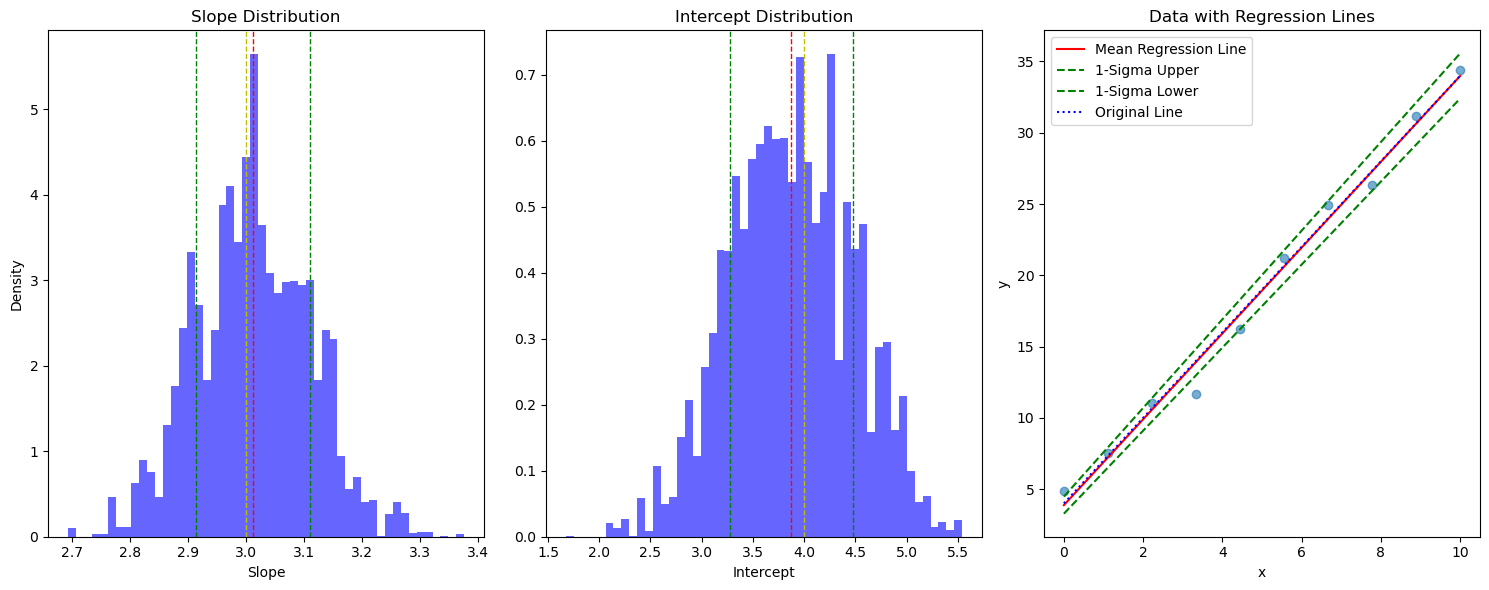

In [27]:
# Plotting the actual distributions of slope and intercept along with the input values and 1-sigma lines

# Calculate the mean and standard deviation for slope and intercept samples
mean_slope = np.mean(mc_samples[:,0])
std_slope = np.std(mc_samples[:,0])
mean_intercept = np.mean(mc_samples[:,1])
std_intercept = np.std(mc_samples[:,1])

# Generate lines for mean and 1-sigma
x_line = np.linspace(np.min(x), np.max(x), 100)
y_line_mean = mean_slope * x_line + mean_intercept
y_line_upper = (mean_slope + std_slope) * x_line + (mean_intercept + std_intercept)
y_line_lower = (mean_slope - std_slope) * x_line + (mean_intercept - std_intercept)

# Adding the input line (original true line)

# Original true line based on the input values of slope and intercept
original_slope = 3
original_intercept = 4
y_original_line = original_slope * x_line + original_intercept

# Plotting the slope and intercept distributions
plt.figure(figsize=(15, 6))

# Slope distribution
plt.subplot(1, 3, 1)
plt.hist(mc_samples[:,0], bins=50, density=True, alpha=0.6, color='blue')
plt.axvline(mean_slope, color='red', linestyle='dashed', linewidth=1)
plt.axvline(original_slope, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mean_slope + std_slope, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean_slope - std_slope, color='green', linestyle='dashed', linewidth=1)
plt.title('Slope Distribution')
plt.xlabel('Slope')
plt.ylabel('Density')

# Intercept distribution
plt.subplot(1, 3, 2)
plt.hist(mc_samples[:,1], bins=50, density=True, alpha=0.6, color='blue')
plt.axvline(mean_intercept, color='red', linestyle='dashed', linewidth=1)
plt.axvline(original_intercept, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mean_intercept + std_intercept, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean_intercept - std_intercept, color='green', linestyle='dashed', linewidth=1)
plt.title('Intercept Distribution')
plt.xlabel('Intercept')

# Data with 1-sigma lines
plt.subplot(1, 3, 3)
plt.scatter(x, y_noisy, alpha=0.6)
plt.plot(x_line, y_line_mean, color='red', label='Mean Regression Line')
plt.plot(x_line, y_line_upper, color='green', linestyle='dashed', label='1-Sigma Upper')
plt.plot(x_line, y_line_lower, color='green', linestyle='dashed', label='1-Sigma Lower')
plt.plot(x_line, y_original_line, color='blue', linestyle='dotted', label='Original Line')
plt.title('Data with Regression Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()


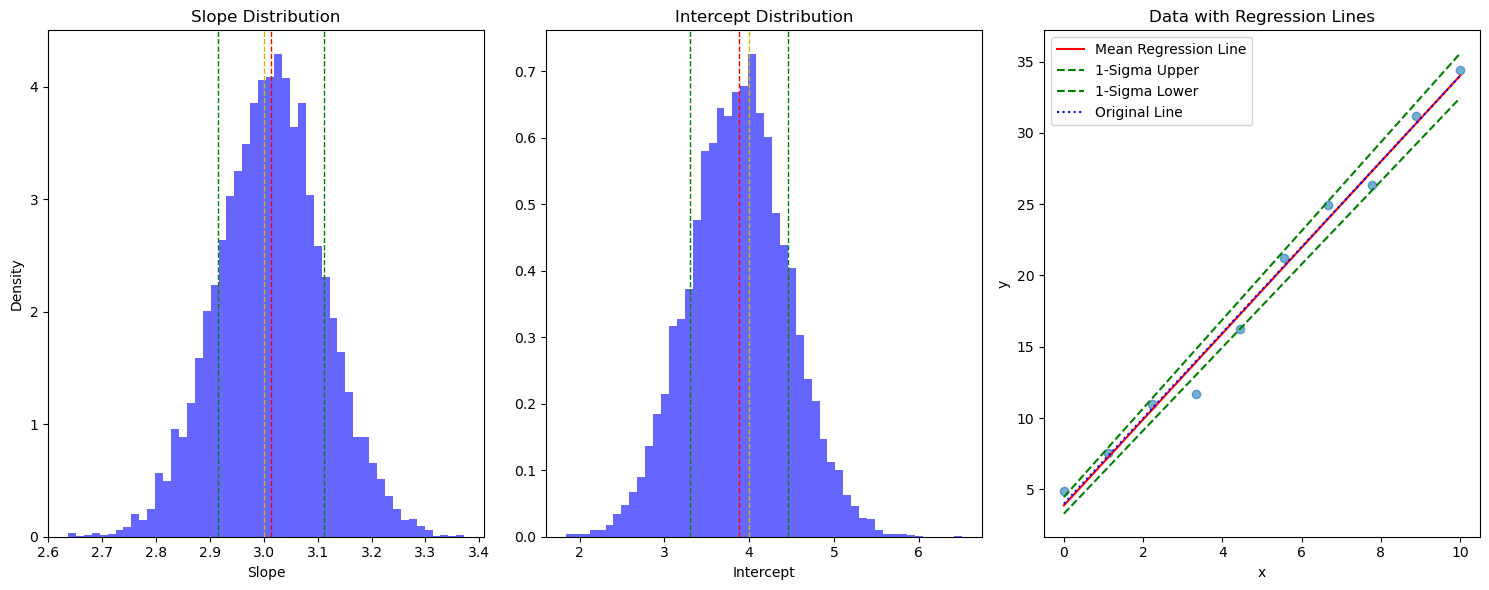

In [28]:
# Plotting the actual distributions of slope and intercept along with the input values and 1-sigma lines with HMC
mean_slope = np.mean(hmc_samples[:,0])
std_slope = np.std(hmc_samples[:,0])
mean_intercept = np.mean(hmc_samples[:,1])
std_intercept = np.std(hmc_samples[:,1])


# Generate lines for mean and 1-sigma
x_line = np.linspace(np.min(x), np.max(x), 100)
y_line_mean = mean_slope * x_line + mean_intercept
y_line_upper = (mean_slope + std_slope) * x_line + (mean_intercept + std_intercept)
y_line_lower = (mean_slope - std_slope) * x_line + (mean_intercept - std_intercept)



# Adding the input line (original true line)

# Original true line based on the input values of slope and intercept
original_slope = 3
original_intercept = 4
y_original_line = original_slope * x_line + original_intercept

# Plotting the slope and intercept distributions
plt.figure(figsize=(15, 6))

# Slope distribution
plt.subplot(1, 3, 1)
plt.hist(hmc_samples[:,0], bins=50, density=True, alpha=0.6, color='blue')
plt.axvline(mean_slope, color='red', linestyle='dashed', linewidth=1)
plt.axvline(original_slope, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mean_slope + std_slope, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean_slope - std_slope, color='green', linestyle='dashed', linewidth=1)
plt.title('Slope Distribution')
plt.xlabel('Slope')
plt.ylabel('Density')

# Intercept distribution
plt.subplot(1, 3, 2)
plt.hist(hmc_samples[:,1], bins=50, density=True, alpha=0.6, color='blue')
plt.axvline(mean_intercept, color='red', linestyle='dashed', linewidth=1)
plt.axvline(original_intercept, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mean_intercept + std_intercept, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean_intercept - std_intercept, color='green', linestyle='dashed', linewidth=1)
plt.title('Intercept Distribution')
plt.xlabel('Intercept')

# Data with 1-sigma lines
plt.subplot(1, 3, 3)
plt.scatter(x, y_noisy, alpha=0.6)
plt.plot(x_line, y_line_mean, color='red', label='Mean Regression Line')
plt.plot(x_line, y_line_upper, color='green', linestyle='dashed', label='1-Sigma Upper')
plt.plot(x_line, y_line_lower, color='green', linestyle='dashed', label='1-Sigma Lower')
plt.plot(x_line, y_original_line, color='blue', linestyle='dotted', label='Original Line')
plt.title('Data with Regression Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()


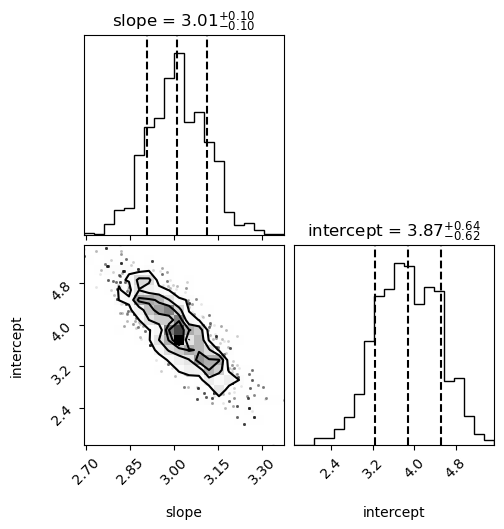

In [8]:
figure = corner.corner(mc_samples, labels=["slope", "intercept"],
                       quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 12})

#figure.suptitle('Corner Plot for 4D Gaussian Samples (HMC)')
plt.show()

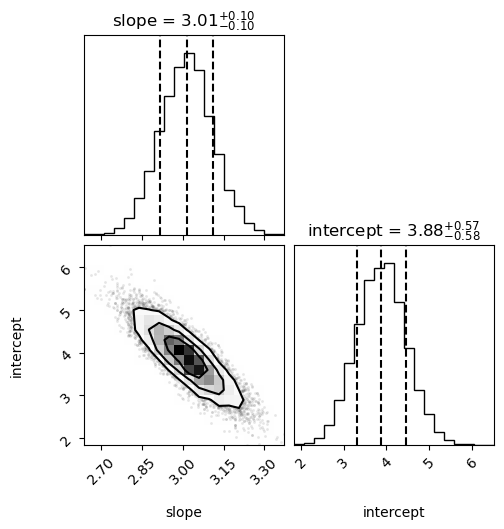

In [9]:
figure = corner.corner(hmc_samples, labels=["slope", "intercept"],
                       quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 12})

#figure.suptitle('Corner Plot for 4D Gaussian Samples (HMC)')
plt.show()